In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv("../Data/Hitters.csv")
df = data.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [4]:
X_ = df.drop(["Salary","League","Division","NewLeague"],axis = 1).astype("float64")

In [5]:
y = df["Salary"]

In [6]:
X_.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [7]:
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [10]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [11]:
from sklearn.svm import SVR

In [12]:
svr_model = SVR("linear").fit(X_train,y_train)
svr_model.predict(X_train)

array([ 403.52804878,  666.91219512,  706.66829268,  194.80853659,
        423.40609756,  666.91219512,  150.08292683,  304.13780488,
        507.88780488,  815.99756098,  801.08902439,  706.66829268,
        731.51585366,  537.70487805,  741.45487805,  562.55243902,
        652.00365854,  145.11341463,  -28.8195122 ,  413.46707317,
        761.33292683,  428.37560976,  463.16219512,  353.83292683,
        219.65609756,  478.07073171,  497.94878049,  328.98536585,
        378.6804878 ,  145.11341463,  135.17439024,  542.67439024,
        681.82073171,  229.59512195,  279.2902439 ,  358.80243902,
        373.71097561,  801.08902439,  463.16219512,  219.65609756,
        155.05243902,  249.47317073,  234.56463415,  194.80853659,
        239.53414634,  746.42439024,  666.91219512,  532.73536585,
        314.07682927,  160.02195122,  368.74146341,  706.66829268,
        637.09512195,  656.97317073,  607.27804878,  622.18658537,
        338.92439024,  691.7597561 ,  378.6804878 ,  701.69878

In [14]:
print ("y = {0} + {1}x".format(svr_model.intercept_[0],
                                svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093x


In [15]:
y_pred = svr_model.predict(X_train)

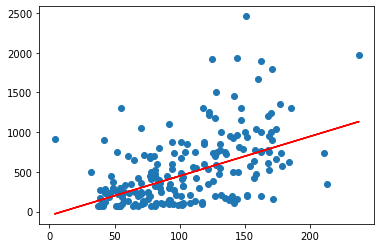

In [17]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r");

In [19]:
y_pred = svr_model.predict(X_test)

In [20]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

In [21]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [23]:
svr_tuned = SVR("linear",
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [24]:
y_pred = svr_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))